In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:58<00:00, 22.0MB/s]
100% 1.06G/1.06G [00:58<00:00, 19.6MB/s]


In [12]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [14]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size = 32,
    image_size =(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size = 32,
    image_size =(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [21]:
# CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [23]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 73s 109ms/step - loss: 1.1435 - accuracy: 0.5790 - val_loss: 0.6504 - val_accuracy: 0.6044
Epoch 2/10
625/625 [==============================] - 66s 106ms/step - loss: 0.6574 - accuracy: 0.6360 - val_loss: 0.6604 - val_accuracy: 0.5932
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5877 - accuracy: 0.6938 - val_loss: 0.6952 - val_accuracy: 0.7014
Epoch 4/10
625/625 [==============================] - 67s 106ms/step - loss: 0.4896 - accuracy: 0.7602 - val_loss: 0.5760 - val_accuracy: 0.6878
Epoch 5/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4144 - accuracy: 0.8008 - val_loss: 0.5294 - val_accuracy: 0.7360
Epoch 6/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3585 - accuracy: 0.8364 - val_loss: 0.4577 - val_accuracy: 0.8000
Epoch 7/10
625/625 [==============================] - 66s 106ms/step - loss: 0.3088 - accuracy: 0.8572 - val_loss: 0.4700 - val_ac

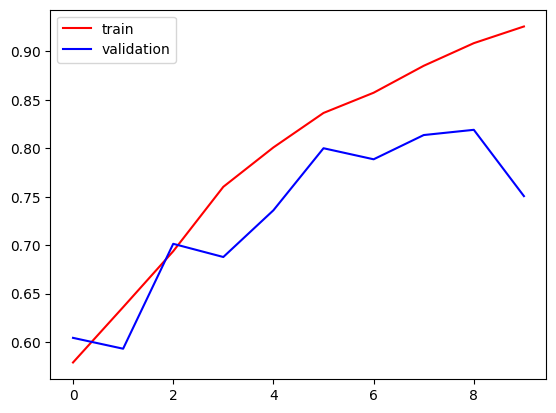

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

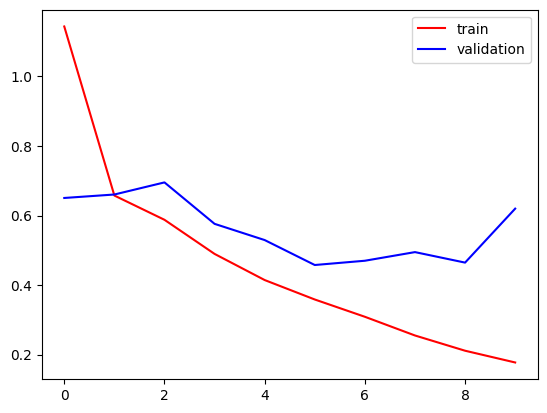

In [26]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()